# Time Series Project -  Forecasting the monthly median sold price for 2016-2017

Group Members:<br>
Maxine Liu
Aakanksha Nallabothula Surya
Hoda Noorian
Sakshi Singla

## Dataset - load, split into train-test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from collections import Counter
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
series = pd.read_csv('zillow-carlifornia .csv', parse_dates=True,
squeeze=True)
series.columns = [ 'Date', 'MedianSoldPrice', 'MedianMortageRate', 'UnemploymentRate', 'MedianRentalPrice']
series.head()

,Date,MedianSoldPrice,MedianMortageRate,UnemploymentRate,MedianRentalPrice
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


In [3]:
series.shape

(164, 5)

#### impute missing MedianRentalPrice_AllHomes data with median value

In [4]:
medianRental = series['MedianRentalPrice']
median_val = np.median(medianRental.loc[~medianRental.isna()])
series['MedianRentalPrice'] = medianRental.fillna(median_val)
series.head()

,Date,MedianSoldPrice,MedianMortageRate,UnemploymentRate,MedianRentalPrice
0,2004-01-31,326752.55,5.02,7.9,2100.0
1,2004-02-29,329501.50,4.94,7.8,2100.0
2,2004-03-31,340125.45,4.74,7.8,2100.0
3,2004-04-30,355329.50,5.16,7.5,2100.0
4,2004-05-31,367818.15,5.64,7.3,2100.0


#### Train-test split

In [5]:
test_set = series[series['MedianSoldPrice'].isna()]
train_set = series[~series['MedianSoldPrice'].isna()]
train_set.head()

,Date,MedianSoldPrice,MedianMortageRate,UnemploymentRate,MedianRentalPrice
0,2004-01-31,326752.55,5.02,7.9,2100.0
1,2004-02-29,329501.50,4.94,7.8,2100.0
2,2004-03-31,340125.45,4.74,7.8,2100.0
3,2004-04-30,355329.50,5.16,7.5,2100.0
4,2004-05-31,367818.15,5.64,7.3,2100.0


In [6]:
test_set.shape

(20, 5)

## Exploratory Data Analysis

#### Pair plots

/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


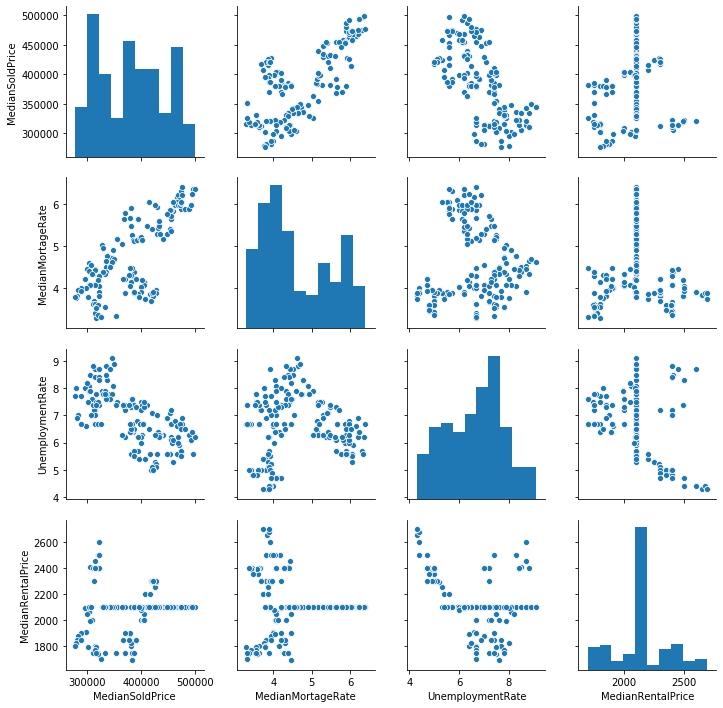

In [7]:
import seaborn as sns
sns.pairplot(series)

#### Correlation matrix

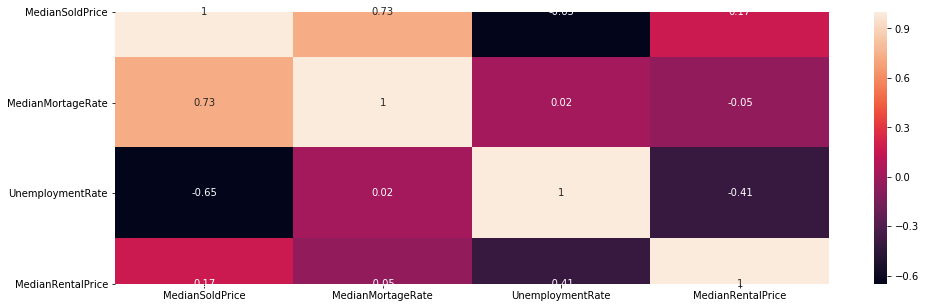

In [8]:
#Correlation Matrix : Quantitative variables
correlation_matrix = series.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

#### Line plot

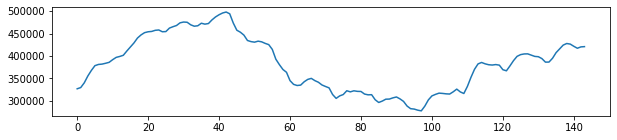

In [9]:
median_sold = train_set['MedianSoldPrice']
fig = plt.figure(figsize=(10, 2))
pyplot.plot(median_sold)
pyplot.show()

There seems to be an increasing then decreasing trend, seasonality exists with lag=12

## Modeling

### Time differencing to eliminate trend

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

##### d=1

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


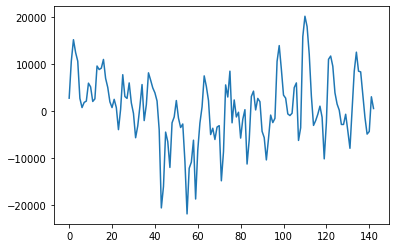

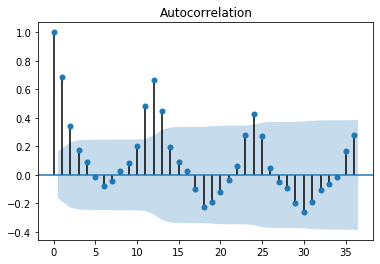

/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


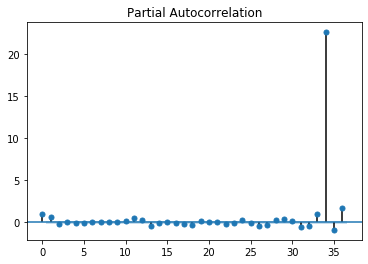

In [11]:
X = train_set['MedianSoldPrice']
d1 = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    d1.append(value)
    
adf_test(d1)

plt.plot(d1) 
plt.show()
plot_acf(d1,lags=36) 
plt.show()
plot_pacf(d1,lags=36) 
plt.show()

#### d=2

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


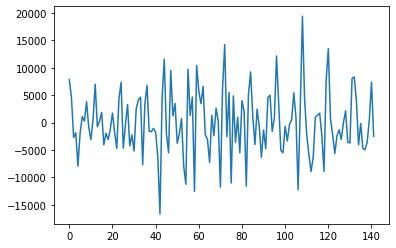

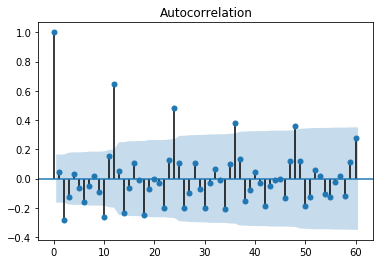

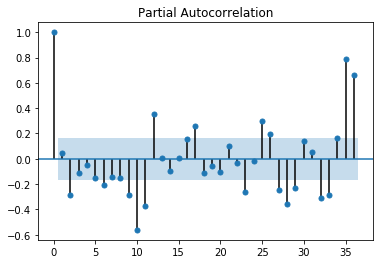

In [12]:
d2 = list()
for i in range(1, len(d1)):
    value = d1[i] - d1[i - 1]
    d2.append(value)
adf_test(d2)
plt.plot(d2) 
plt.show()
plot_acf(d2,lags=60) 
plt.show()
plot_pacf(d2,lags=36) 
plt.show()

#### d=3

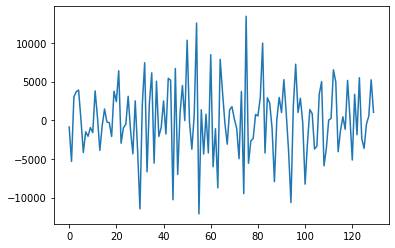

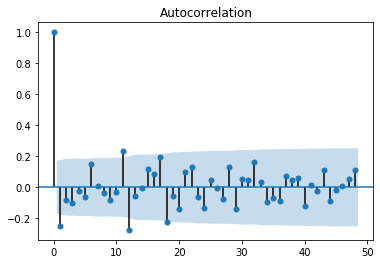

Results of Dickey-Fuller Test:
Test Statistic                  -5.149454
p-value                          0.000011
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [13]:
d3 = list()
for i in range(12, len(d2)):
    value = d2[i] - d2[i - 12]
    d3.append(value)


plt.plot(d3) 
plot_acf(d3,lags=48) 
plt.show()

adf_test(d3)

### Model Selection - experiments

#### Train-test split

In [14]:
train_size = int(len(X) * 0.85)
train, test = X[:train_size], X[train_size:]
train.head()

0    326752.55
1    329501.50
2    340125.45
3    355329.50
4    367818.15
Name: MedianSoldPrice, dtype: float64

### ARIMA - d=1,D=2,m=12

In [15]:
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, 
                           start_P=0, seasonal=True,
                           d=1,D=2, m=12,  trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1955.260, BIC=1968.134, Fit time=1.512 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=2036.314, BIC=2041.464, Fit time=0.023 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 2, 0, 12); AIC=2045.398, BIC=2055.697, Fit time=0.324 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1980.386, BIC=1990.685, Fit time=0.321 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 1, 12); AIC=1957.283, BIC=1972.732, Fit time=2.136 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 0, 12); AIC=2043.602, BIC=2053.901, Fit time=0.263 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 2, 12); AIC=1962.842, BIC=1978.290, Fit time=1.469 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 2, 12); AIC=1963.995, BIC=1982.018, Fit time=4.091 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1948.400, BIC=1963.848, Fit time=1.857 seconds
Fit ARIMA: order=(2, 1, 0) s

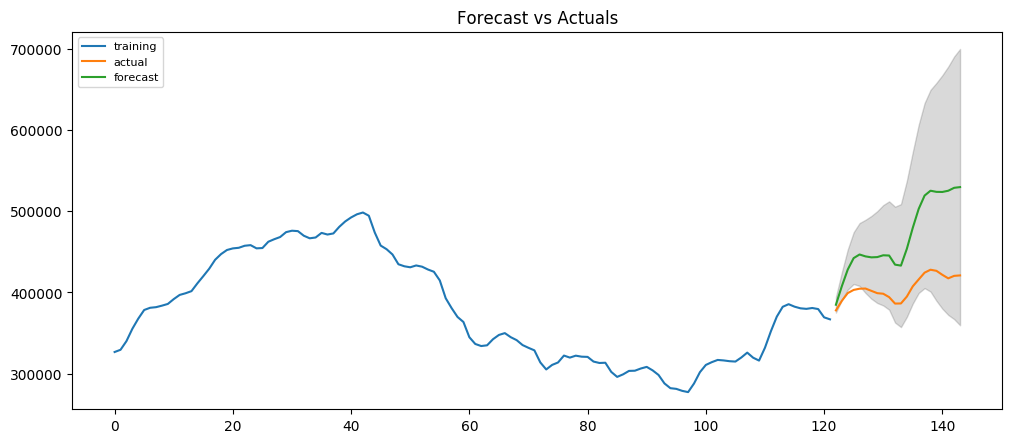

In [16]:
fitted = model.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [17]:
mse = ((fc_series - test) ** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

70291.93479019073


### ARIMA - d=2,D=2, m=12

In [18]:
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=4, max_q=4, 
                           start_P=0, seasonal=True,
                           d=2,D=2, m=12,  trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1924.777, BIC=1937.599, Fit time=1.487 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 12); AIC=2001.802, BIC=2006.931, Fit time=0.025 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 12); AIC=2004.392, BIC=2014.649, Fit time=0.284 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1921.433, BIC=1931.691, Fit time=1.303 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 1, 12); AIC=1950.522, BIC=1963.344, Fit time=0.360 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 0, 12); AIC=2003.008, BIC=2010.701, Fit time=0.078 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 2, 12); AIC=1941.439, BIC=1954.261, Fit time=2.442 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 2, 12); AIC=1952.590, BIC=1967.976, Fit time=3.070 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 1, 12); AIC=1932.152, BIC=1939.846, Fit time=0.652 seconds
Fit ARIMA: order=(0, 2, 2) s

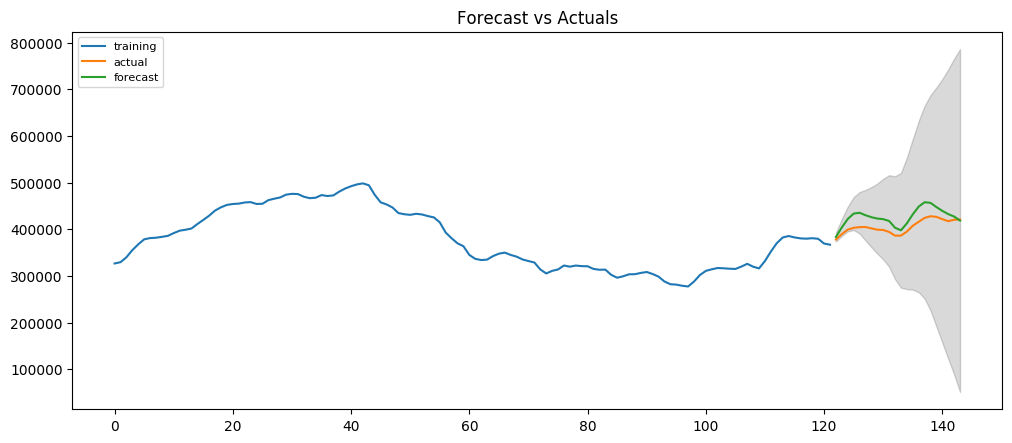

In [19]:
fitted = model.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
mse = ((fc_series - test)** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

22242.191553268178


### SARIMAX - MedianMortageRate, Unemployment - order (0, 3, 3)x(0,2,2,12)

In [21]:
sarimax_data= train_set[['MedianMortageRate','UnemploymentRate']]
exog_train=sarimax_data[:train_size]
exog_test=sarimax_data[train_size:]

In [22]:
modelx = SARIMAX(train, order=(0, 3, 3), seasonal_order=(0,2,2,12),exog=exog_train)
fitx=modelx.fit()
print(fitx.summary())

/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                 Statespace Model Results                                 
Dep. Variable:                    MedianSoldPrice   No. Observations:                  122
Model:             SARIMAX(0, 3, 3)x(0, 2, 2, 12)   Log Likelihood                -950.341
Date:                            Sun, 08 Dec 2019   AIC                           1916.681
Time:                                    19:52:47   BIC                           1937.112
Sample:                                         0   HQIC                          1924.937
                                            - 122                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MedianMortageRate  2303.0907   1885.185      1.222      0.222   -1391.804    5997.985
UnemploymentRa

In [23]:
fc = fitx.predict(start=122, end=143, exog=exog_test)

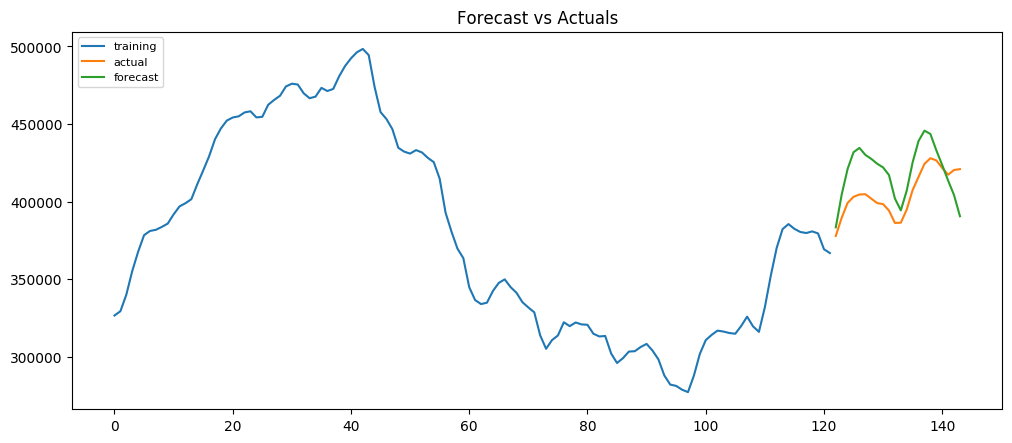

In [24]:
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [25]:
mse = ((fc_series - test)** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

19922.849068695512


### SARIMAX auto select with MedianMortageRate, Unemployment, d=2,D=2,m=12

In [26]:
#auto select orders
model = pm.auto_arima(train, exogenous=exog_train, start_p=1, start_q=1,
                           max_p=4, max_q=4, 
                           start_P=0, seasonal=True,
                            D=2,m=12, d=2,  trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1920.513, BIC=1938.463, Fit time=1.736 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 12); AIC=2003.243, BIC=2013.501, Fit time=0.037 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 12); AIC=2004.595, BIC=2019.981, Fit time=0.413 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1923.369, BIC=1938.755, Fit time=1.712 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 2, 1, 12); AIC=1946.412, BIC=1966.926, Fit time=2.096 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 0, 12); AIC=1987.130, BIC=2002.516, Fit time=0.837 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 2, 12); AIC=1951.537, BIC=1972.052, Fit time=3.967 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 2, 2, 12); AIC=1954.618, BIC=1977.697, Fit time=4.838 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1932.649, BIC=1953.164, Fit time=1.883 seconds
Fit ARIMA: order=(1, 2, 0) s

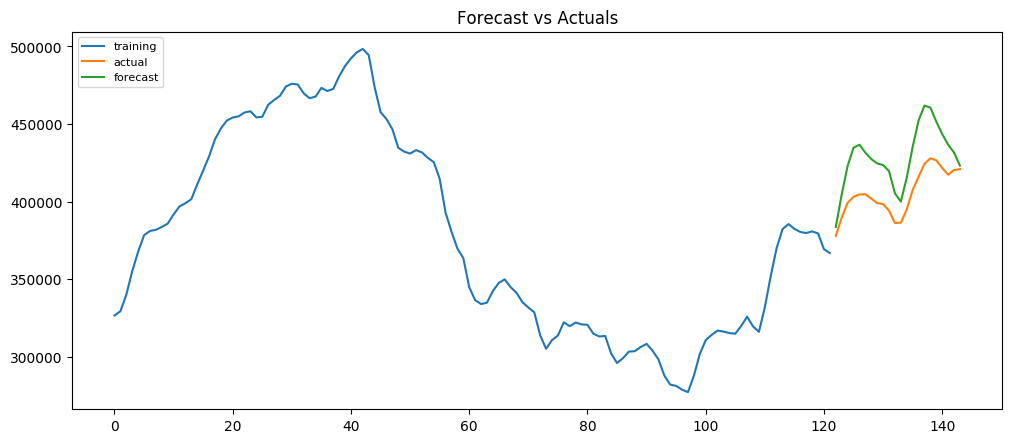

In [27]:
fitted = model.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
mse = ((fc_series - test) ** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

24565.030188840472


### SARIMAX - MedianMortgageRate only - auto select with D=2,m=12,d=1

In [29]:
sarimax_data=train_set[['MedianMortageRate']]
exog_train=sarimax_data[:train_size]
exog_test=sarimax_data[train_size:]

In [30]:
#auto select orders
model = pm.auto_arima(train, exogenous=exog_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, 
                           start_P=0, seasonal=True,
                            D=2,m=12, d=1,  trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1955.185, BIC=1970.633, Fit time=1.794 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=2037.589, BIC=2045.313, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 2, 0, 12); AIC=2046.931, BIC=2059.804, Fit time=0.421 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1981.107, BIC=1993.981, Fit time=0.418 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 1, 12); AIC=1957.317, BIC=1975.340, Fit time=2.117 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 0, 12); AIC=2045.151, BIC=2058.025, Fit time=0.201 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 2, 12); AIC=1962.696, BIC=1980.719, Fit time=1.571 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 2, 12); AIC=1963.554, BIC=1984.152, Fit time=4.340 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1947.863, BIC=1965.886, Fit time=2.183 seconds
Fit ARIMA: order=(2, 1, 0) s

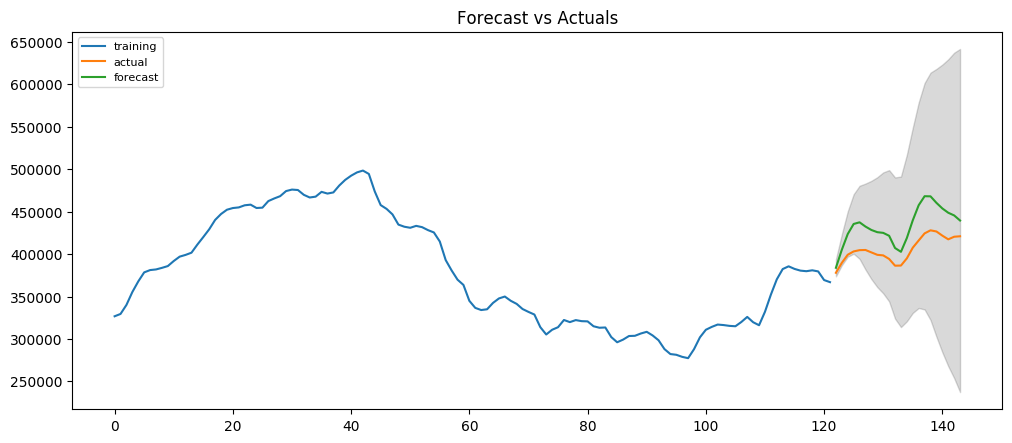

In [31]:
fitted = model.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [32]:
mse = ((fc_series - test) ** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

28826.655043105908


### VAR - all variables

In [33]:
#VAR
var_series =train_set[['MedianSoldPrice', 'MedianMortageRate', 'UnemploymentRate', 'MedianRentalPrice']]
train = var_series[:int(0.75*(len(var_series)))]
test = var_series[int(0.75*(len(var_series))):]
train.head()

,MedianSoldPrice,MedianMortageRate,UnemploymentRate,MedianRentalPrice
0,326752.55,5.02,7.9,2100.0
1,329501.50,4.94,7.8,2100.0
2,340125.45,4.74,7.8,2100.0
3,355329.50,5.16,7.5,2100.0
4,367818.15,5.64,7.3,2100.0


In [34]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(2)
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Dec, 2019
Time:                     19:53:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    21.3993
Nobs:                     106.000    HQIC:                   20.8614
Log likelihood:          -1651.85    FPE:                7.97021e+08
AIC:                      20.4948    Det(Omega_mle):     5.75310e+08
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                    -5629.538706     10307.019651           -0.546           0.585
L1.MedianSoldPrice           1.609540         0.080406           20.018           0.000
L1.MedianMortageRate  

In [35]:
fc = model_fit.forecast(model_fit.y, steps=len(test))
cols = var_series.columns
pred = pd.DataFrame(index=test.index,columns=cols)
for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]

/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


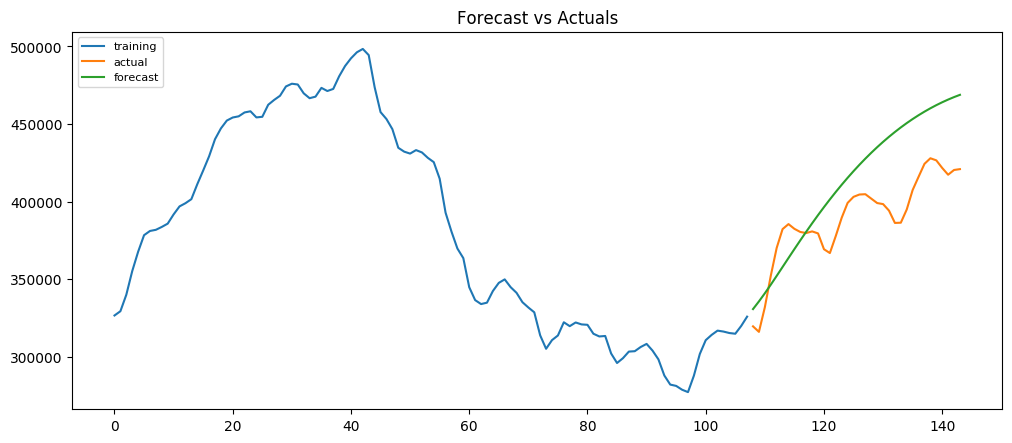

In [36]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['MedianSoldPrice'], label='training')
plt.plot(test['MedianSoldPrice'], label='actual')
plt.plot(pred['MedianSoldPrice'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [37]:
mse = ((pd.Series(pred['MedianSoldPrice']) - test['MedianSoldPrice']) ** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

32929.60225091285


## VAR - medianMortgage, unemployment 

In [38]:
var_series =train_set[['MedianSoldPrice', 'MedianMortageRate']]
train = var_series[:int(0.75*(len(var_series)))]
test = var_series[int(0.75*(len(var_series))):]
train.head()

,MedianSoldPrice,MedianMortageRate
0,326752.55,5.02
1,329501.50,4.94
2,340125.45,4.74
3,355329.50,5.16
4,367818.15,5.64


In [39]:
model = VAR(endog=train)
model_fit = model.fit(2)
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Dec, 2019
Time:                     19:53:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.8614
Nobs:                     106.000    HQIC:                   13.7120
Log likelihood:          -1012.15    FPE:                    814493.
AIC:                      13.6102    Det(Omega_mle):         742768.
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     4421.520569      3000.020890            1.474           0.141
L1.MedianSoldPrice           1.660193         0.075275           22.055           0.000
L1.MedianMortageRate  

In [40]:
fc = model_fit.forecast(model_fit.y, steps=len(test))
cols = var_series.columns
pred = pd.DataFrame(index=test.index,columns=cols)
for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]

/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


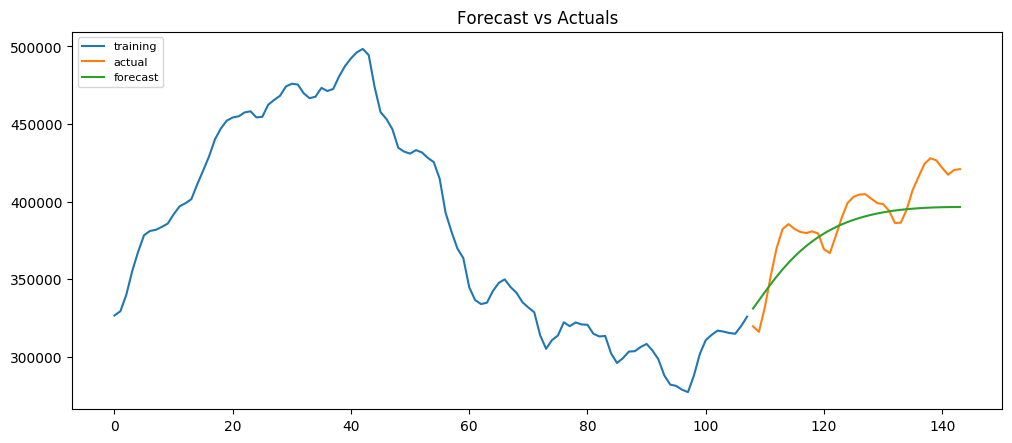

In [41]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['MedianSoldPrice'], label='training')
plt.plot(test['MedianSoldPrice'], label='actual')
plt.plot(pred['MedianSoldPrice'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [42]:
mse = ((pd.Series(pred['MedianSoldPrice']) - test['MedianSoldPrice']) ** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

16579.898172621302


## Final Model Selection

We found SARIMAX - MedianMortageRate, Unemployment - order (0, 3, 3)x(0,2,2,12) to be the best model based on rmse. We now fit it on the entire train_data 

### SARIMAX - MedianMortageRate, Unemployment - order (0, 3, 3)x(0,2,2,12)  trained on entire train_set

In [43]:
train_size = int(len(X) * 0.85)
train, test = X[:train_size], X[train_size:]
train.head()

0    326752.55
1    329501.50
2    340125.45
3    355329.50
4    367818.15
Name: MedianSoldPrice, dtype: float64

In [44]:
sarimax_data= train_set[['MedianMortageRate','UnemploymentRate']]
exog_train=sarimax_data
exog_test=sarimax_data

In [45]:
modelx = SARIMAX(X, order=(0, 3, 3), seasonal_order=(0,2,2,12),exog=exog_train)
fitx=modelx.fit()
print(fitx.summary())

/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 Statespace Model Results                                 
Dep. Variable:                    MedianSoldPrice   No. Observations:                  144
Model:             SARIMAX(0, 3, 3)x(0, 2, 2, 12)   Log Likelihood               -1165.013
Date:                            Sun, 08 Dec 2019   AIC                           2346.025
Time:                                    19:53:59   BIC                           2368.123
Sample:                                         0   HQIC                          2354.996
                                            - 144                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MedianMortageRate  1574.5766   1705.627      0.923      0.356   -1768.390    4917.543
UnemploymentRa

/Users/aakanksha/miniconda3/envs/LR/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
fitx.plot_diagnostics()
plt.show()

In [46]:
fc = fitx.predict(start=122, end=143, exog=exog_test)

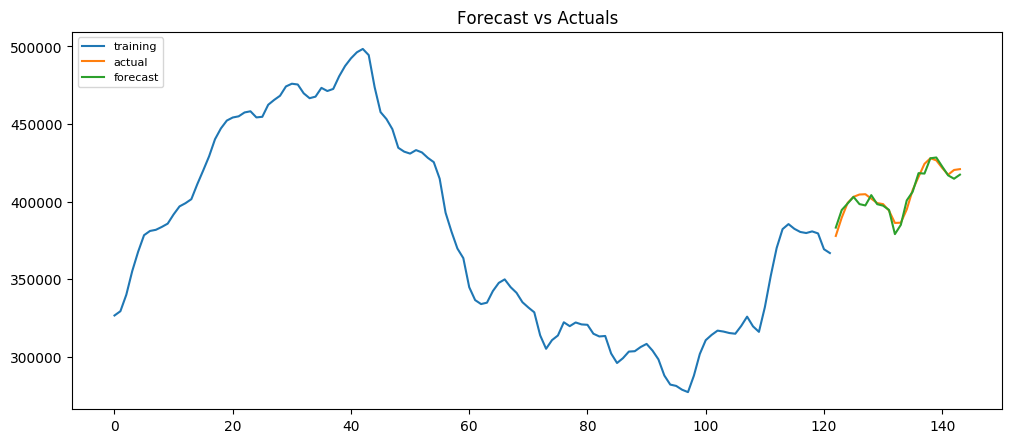

In [47]:
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [48]:
mse = ((fc_series - test)** 2).mean()
rmse=np.sqrt(mse)
print(rmse)

3894.9652005313224


## Prediction on test data

In [49]:
exog_test = test_set[['MedianMortageRate','UnemploymentRate']]
fc = fitx.predict(start=143, end=163, exog=exog_test)

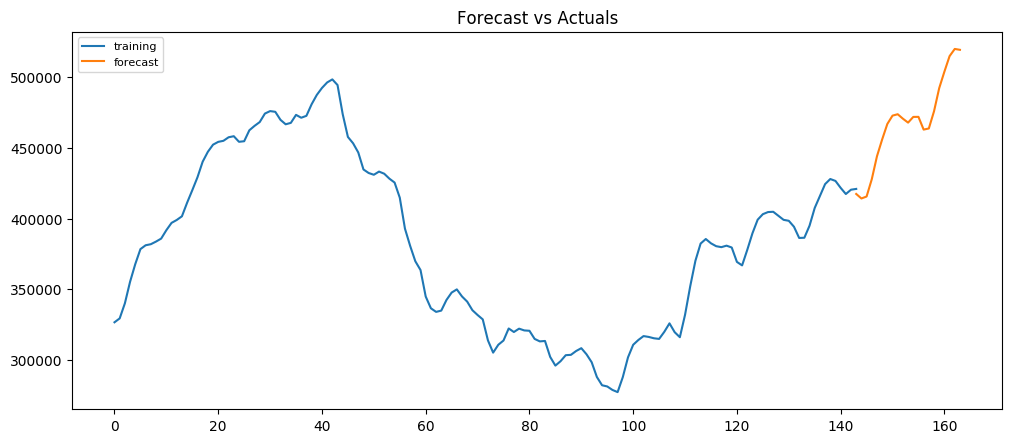

In [50]:
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(X, label='training')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Save final prediction to csv

In [51]:
preds = list(fc_series.values)
df = pd.DataFrame(data={"MedianSoldPrice": preds})
df.to_csv("prediction.csv", sep=',',index=False)

In [52]:
pd.read_csv('prediction.csv')

,MedianSoldPrice
0,417445.640198
1,414248.213499
2,415628.528051
3,427830.598180
4,444060.109660
5,455949.448877
6,466906.502783
7,472796.580410
8,473784.634513
9,470633.306576
